In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Reviews.csv')

In [3]:
df.head(15)

,Id,ProductId,UserId,Product,company,Score,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,Paracetmol,AbbVie Ltd,5,I have bought the same medice from different b...
1,2,B00813GRG4,A1D87F6ZCVE5NK,Paracetmol,Accord-UK Ltd,1,The medicine is not good as expected
2,3,B000LQOCH0,ABXLMWJIXXAIN,Paracetmol,Aguettant Ltd,4,I received the medicines which I ordered and I...
3,4,B000UA0QIQ,A395BORC6FGVXV,Paracetmol,AJ Vaccines A/S,3,The medicine is better
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,Paracetmol,Allergan Ltd,2,I ordered some medicines using the website but...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Product,AbbVie Ltd,4,I received the medicines which I ordered and I...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,Paracetmol,Accord-UK Ltd,5,I have bought the same medice from different b...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Paracetmol,Aguettant Ltd,3,The medicine is better
8,9,B000E7L2R4,A1MZYO9TZK0BBI,Paracetmol,AJ Vaccines A/S,5,I have bought the same medice from different b...
9,10,B00171APVA,A21BT40VZCCYT4,Paracetmol,Allergan Ltd,5,I have bought the same medice from different b...


In [4]:
df.shape

(15, 7)

In [5]:
! pip install textblob

In [6]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))# Lower casing and removing punctuations


In [7]:
 #Removal of stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head(15)

0                   bought medice different brands good
1                                medicine good expected
2       received medicines ordered happy fast delivery.
3                                       medicine better
4     ordered medicines using website found expire d...
5       received medicines ordered happy fast delivery.
6                   bought medice different brands good
7                                       medicine better
8                   bought medice different brands good
9                   bought medice different brands good
10                                             expected
11                  bought medice different brands good
12                                 medice good expected
13      received medicines ordered happy fast delivery.
14                  bought medice different brands good
Name: Text, dtype: object

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(15)

0                    bought medice different brand good
1                                medicine good expected
2        received medicine ordered happy fast delivery.
3                                       medicine better
4     ordered medicine using website found expire da...
5        received medicine ordered happy fast delivery.
6                    bought medice different brand good
7                                       medicine better
8                    bought medice different brand good
9                    bought medice different brand good
10                                             expected
11                   bought medice different brand good
12                                 medice good expected
13       received medicine ordered happy fast delivery.
14                   bought medice different brand good
Name: Text, dtype: object

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Score', ylabel='count'>

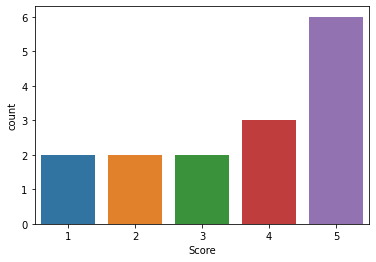

In [11]:
sns.countplot(data = df, x = 'Score')

In [12]:
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [13]:
rating_1 = reviews[reviews['Score'] == 1]
rating_2 = reviews[reviews['Score'] == 2]
rating_3 = reviews[reviews['Score'] == 3]
rating_4 = reviews[reviews['Score'] == 4]
rating_5 = reviews[reviews['Score'] == 5]

In [14]:
reviews_sample = pd.concat([rating_1,rating_2,rating_3,rating_4,rating_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [15]:
print(reviews_sample.Text)

0                                medicine good expected
1                                  medice good expected
2     ordered medicine using website found expire da...
3                                              expected
4                                       medicine better
5                                       medicine better
6        received medicine ordered happy fast delivery.
7        received medicine ordered happy fast delivery.
8        received medicine ordered happy fast delivery.
9                    bought medice different brand good
10                   bought medice different brand good
11                   bought medice different brand good
12                   bought medice different brand good
13                   bought medice different brand good
14                   bought medice different brand good
Name: Text, dtype: object


In [22]:
#spliting the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

print(negative_reviews.Text)


0                               medicine good expected
1                                 medice good expected
2    ordered medicine using website found expire da...
3                                             expected
Name: Text, dtype: object


In [23]:
print(positive_reviews.Text)

6     received medicine ordered happy fast delivery.
7     received medicine ordered happy fast delivery.
8     received medicine ordered happy fast delivery.
9                 bought medice different brand good
10                bought medice different brand good
11                bought medice different brand good
12                bought medice different brand good
13                bought medice different brand good
14                bought medice different brand good
Name: Text, dtype: object


In [16]:
!pip install vaderSentiment

In [17]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Reviews.csv')
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.757,0.243,0.5927
1,0.286,0.714,0.000,-0.3412
2,0.000,0.760,0.240,0.6948
3,0.000,0.508,0.492,0.4404
4,0.143,0.826,0.032,-0.7218


In [19]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)


,Id,ProductId,UserId,Product,company,Score,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,Paracetmol,AbbVie Ltd,5,I have bought the same medice from different b...,0.000,0.757,0.243,0.5927
1,2,B00813GRG4,A1D87F6ZCVE5NK,Paracetmol,Accord-UK Ltd,1,The medicine is not good as expected,0.286,0.714,0.000,-0.3412
2,3,B000LQOCH0,ABXLMWJIXXAIN,Paracetmol,Aguettant Ltd,4,I received the medicines which I ordered and I...,0.000,0.760,0.240,0.6948


In [20]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,Product,company,Score,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,Paracetmol,AbbVie Ltd,5,I have bought the same medice from different b...,0.000,0.757,0.243,0.5927,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,Paracetmol,Accord-UK Ltd,1,The medicine is not good as expected,0.286,0.714,0.000,-0.3412,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,Paracetmol,Aguettant Ltd,4,I received the medicines which I ordered and I...,0.000,0.760,0.240,0.6948,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Paracetmol,AJ Vaccines A/S,3,The medicine is better,0.000,0.508,0.492,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,Paracetmol,Allergan Ltd,2,I ordered some medicines using the website but...,0.143,0.826,0.032,-0.7218,Negative


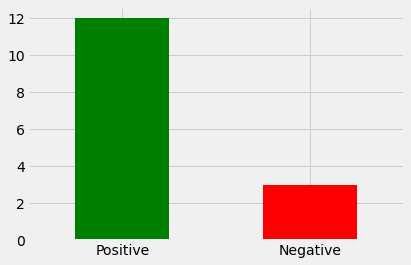

In [21]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['green','red']);